## LIBRERIAS

In [ ]:
import shutil
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

## CARGA BASE DE DATOS

In [ ]:
# Crear la carpeta .kaggle si no existe
os.makedirs("/root/.kaggle", exist_ok=True)
# Mover el archivo kaggle.json a la carpeta
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
# Dar permisos adecuados
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d deathperminut/material-spinners-data

Dataset URL: https://www.kaggle.com/datasets/deathperminut/material-spinners-data
License(s): CC0-1.0
 92% 116M/126M [00:00<00:00, 1.21GB/s]
100% 126M/126M [00:00<00:00, 1.13GB/s]


In [ ]:
# Nombre del archivo descargado (ajústalo según sea necesario)
dataset_zip = "/content/material-spinners-data.zip"
# Extraer los archivos
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")
# Ver archivos extraídos
os.listdir("dataset")

['__notebook__.ipynb', 'data.npy.npz']

In [ ]:
#load data
file_ = '/content/dataset/data.npy.npz'
data = np.load(file_)
MS,Nest,L,rd,So,T,Jex,Jex2,Jex3,Jex4,Kan1,KanS,Hex,kd,KDM = data['MS'],data['Nest'],data['L'],data['rd'],data['So'],data['T'],data['Jex'],data['Jex2'],data['Jex3'],data['Jex4'],data['Kan1'],data['KanS'],data['Hex'],data['kd'],data['KDM']

In [ ]:
MS.shape

(54044, 39, 39, 1)

(array([    0.,     0.,     0.,     0.,     0., 54044.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

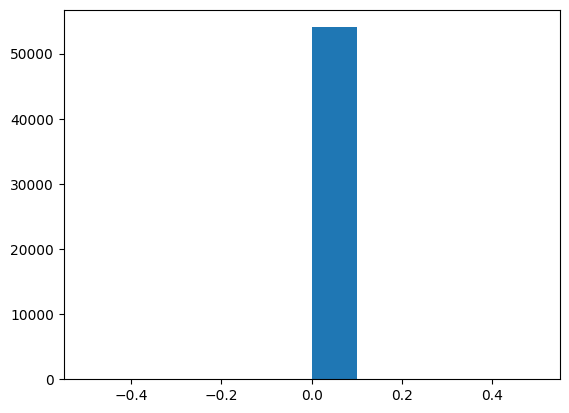

In [ ]:
plt.hist(KDM)  ## LISTADO DE VARIABLES KDM,T,Nest,Kan1,KanS,Hex

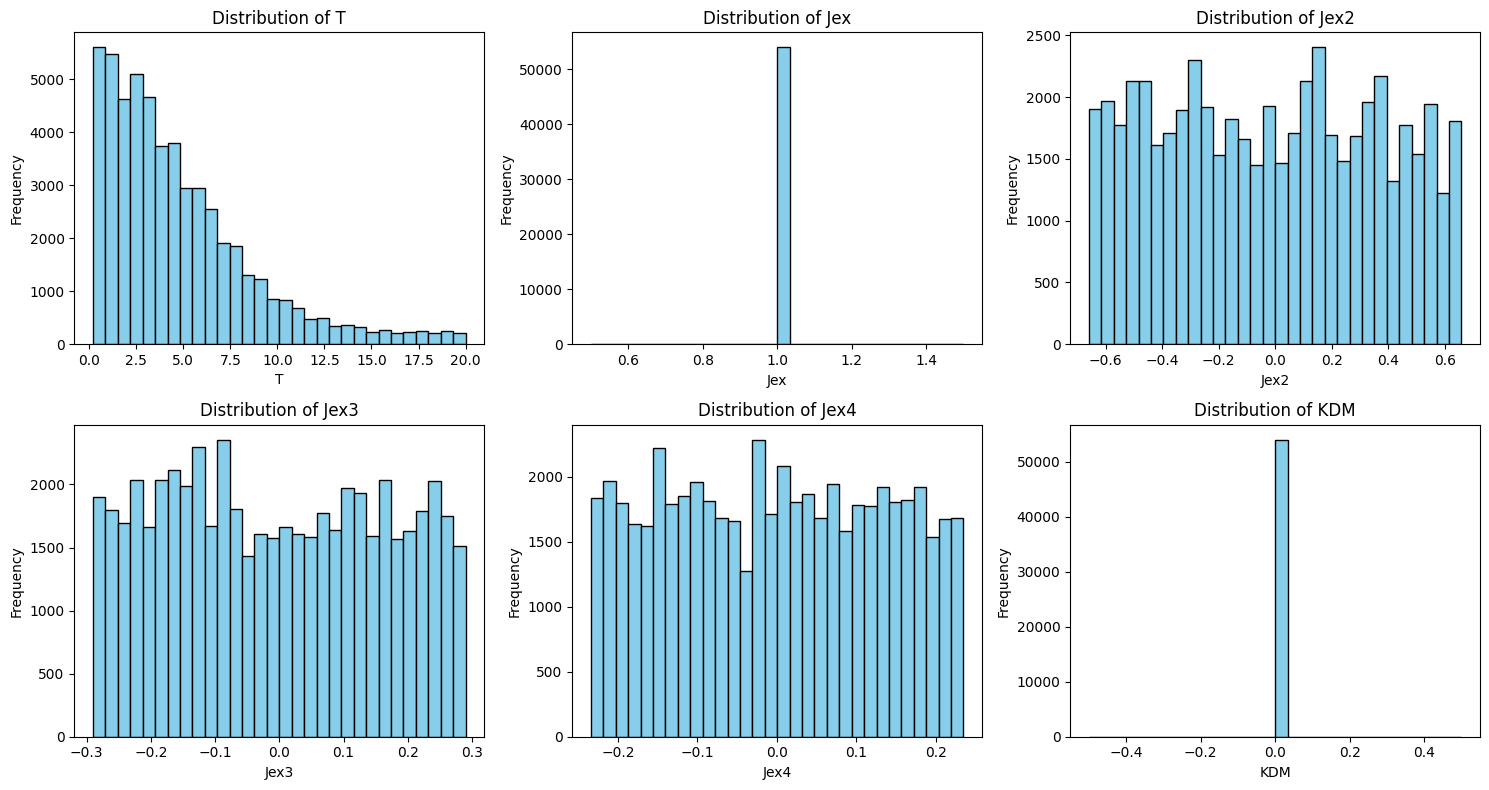

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya tienes definidos todos estos arrays:
# MS, Nest, L, rd, So, T, Jex, Jex2, Jex3, Jex4, Kan1, KanS, Hex, kd, KDM

# Los colocamos en un diccionario para iterar fácilmente
variables = {
    #"rd": rd,
    #"So": So,
    "T": T,
    "Jex": Jex,
    "Jex2": Jex2,
    "Jex3": Jex3,
    "Jex4": Jex4,
    #"Kan1": Kan1,
    #"KanS": KanS,
    #"Hex": Hex,
    #"kd": kd,
    "KDM": KDM,
}

# Cantidad de variables
n_vars = len(variables)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Graficar cada histograma
for idx, (nombre, valores) in enumerate(variables.items()):
    axes[idx].hist(valores, bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Distribution of {nombre}")
    axes[idx].set_xlabel(nombre)
    axes[idx].set_ylabel("Frequency")

# Ocultar subplots vacíos (si hay)
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# Guardar como SVG
plt.savefig("distribuciones_parametrosTJex2.svg", format="svg")
plt.show()

filtramos el dataset para usarlo con el modelo general que teniamos, en este caso Jex2,Jex3,Jex4 que sea igual a cero

In [ ]:
0 == 0.0

True

In [ ]:
import numpy as np


# Crear máscara de condición
mascara = (
    (Jex2 >= -0.08) & (Jex2 <= 0.08) &
    (Jex3 >= -0.08) & (Jex3 <= 0.08) &
    (Jex4 >= -0.08) & (Jex4 <= 0.08)
)


# Aplicar la máscara a todos los arreglos
MS_filtrado =np.array([img for i, img in enumerate(MS) if mascara[i]])
Nest_filtrado = np.array(Nest)[mascara]
L_filtrado = np.array(L)[mascara]
rd_filtrado = np.array(rd)[mascara]
So_filtrado = np.array(So)[mascara]
T_filtrado = np.array(T)[mascara]
Jex_filtrado = np.array(Jex)[mascara]
Jex2_filtrado = Jex2[mascara]
Jex3_filtrado = Jex3[mascara]
Jex4_filtrado = Jex4[mascara]
Kan1_filtrado = np.array(Kan1)[mascara]
KanS_filtrado = np.array(KanS)[mascara]
Hex_filtrado = np.array(Hex)[mascara]
kd_filtrado = np.array(kd)[mascara]
KDM_filtrado = np.array(KDM)[mascara]


In [ ]:
MS_filtrado.shape

(273, 39, 39, 1)

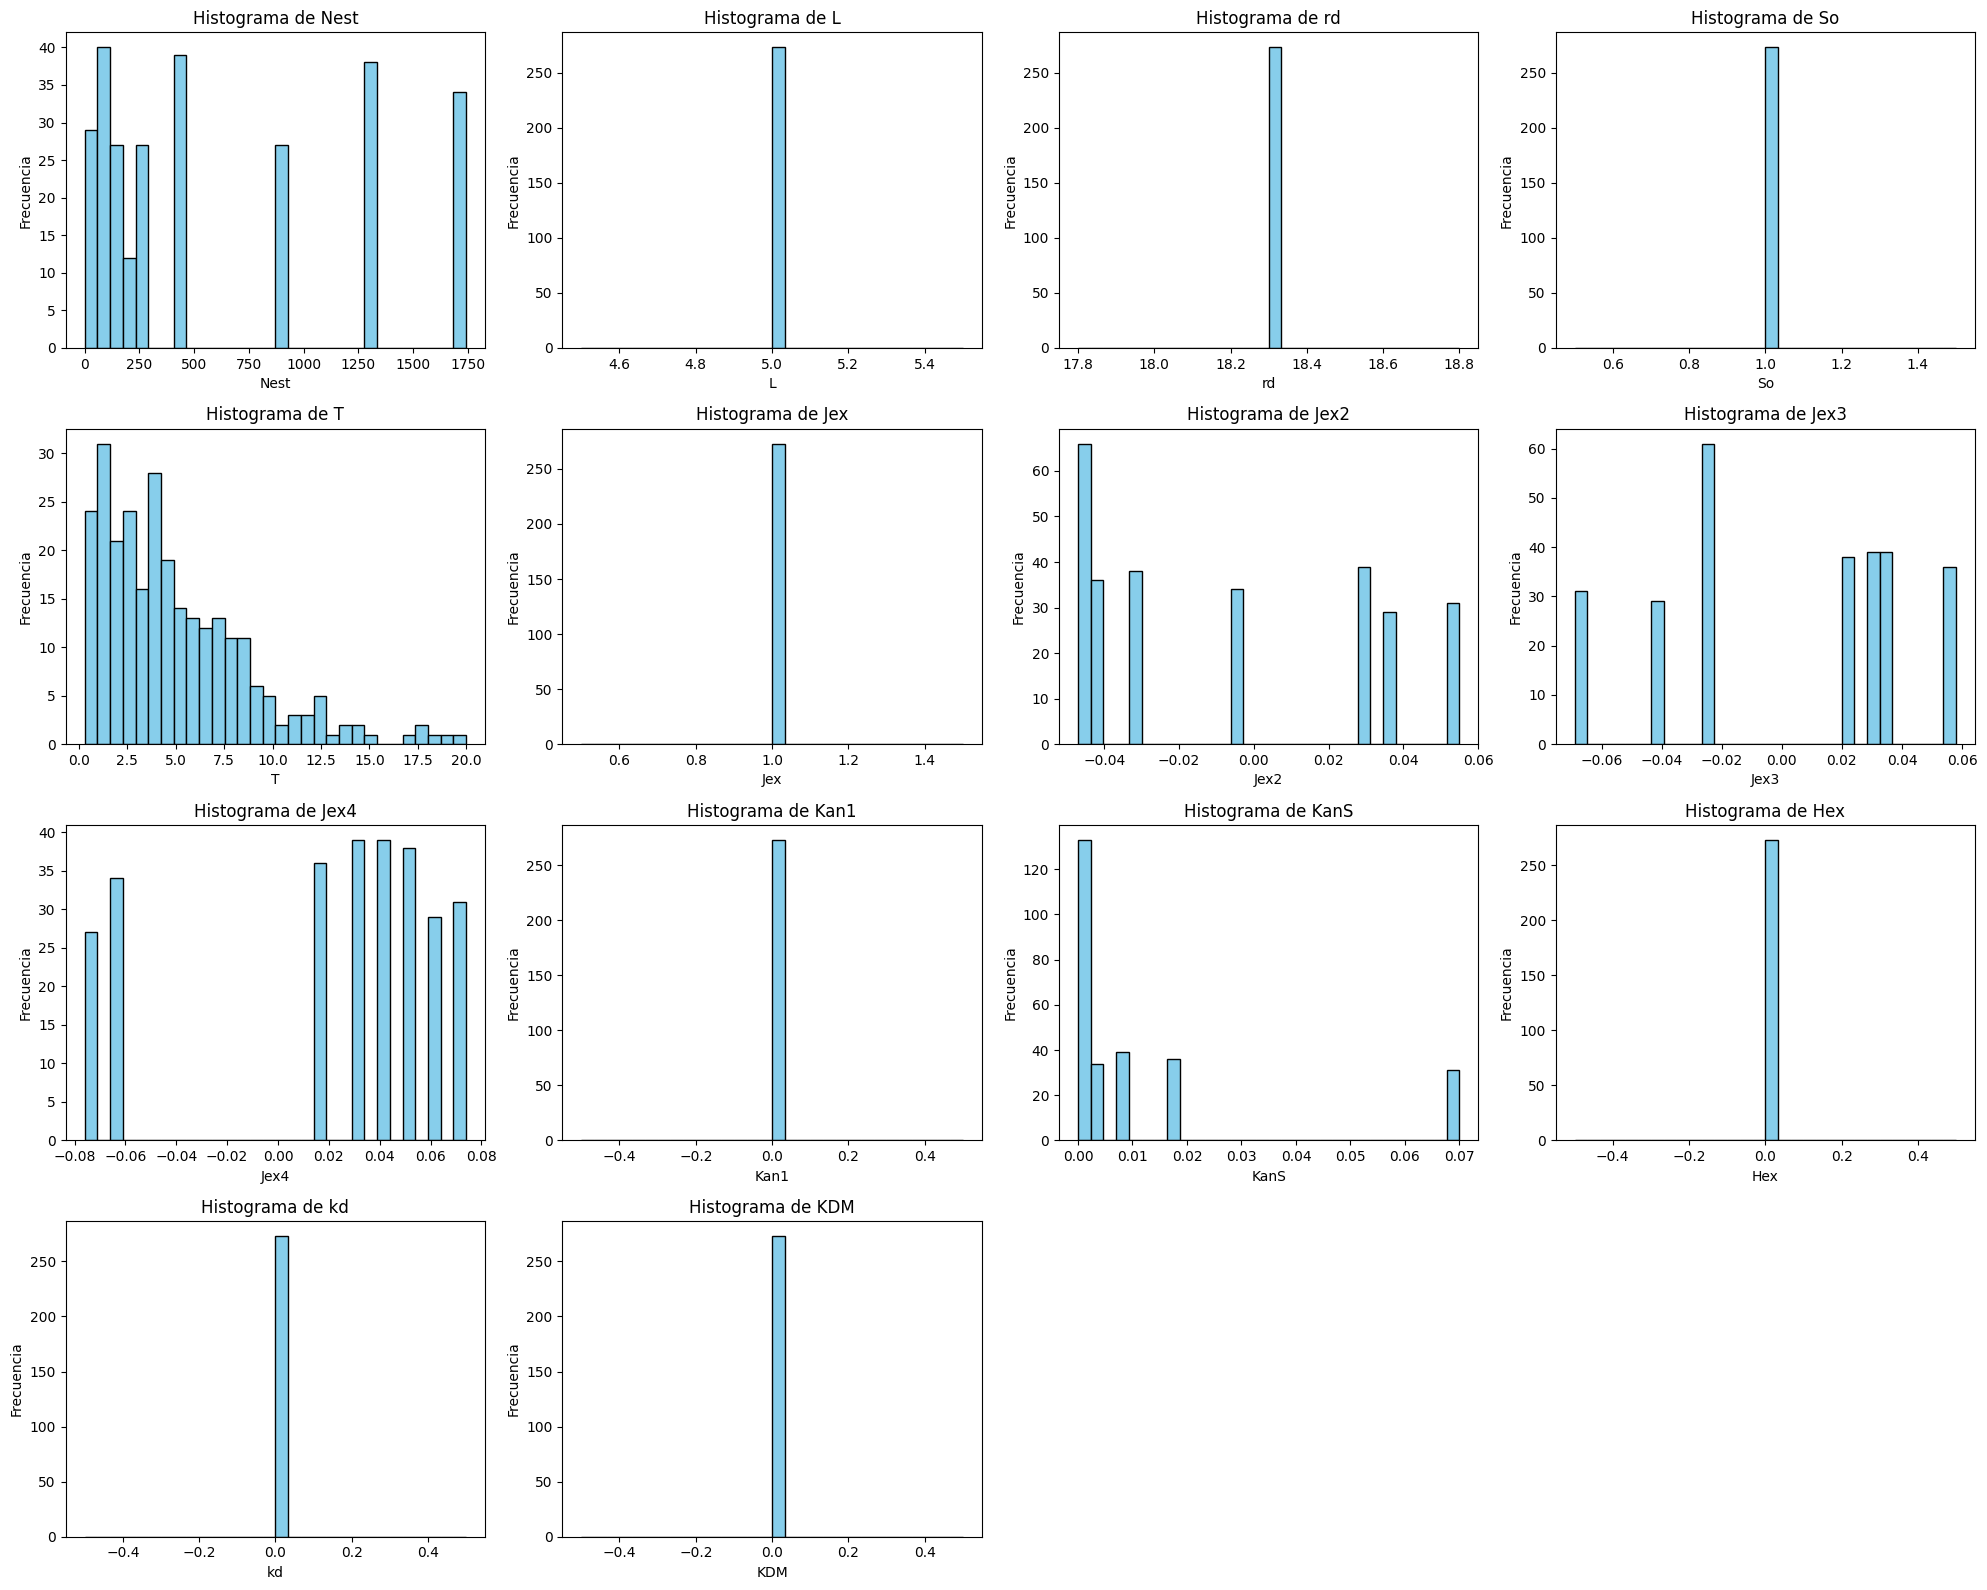

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya tienes definidos todos estos arrays:
# MS, Nest, L, rd, So, T, Jex, Jex2, Jex3, Jex4, Kan1, KanS, Hex, kd, KDM

# Los colocamos en un diccionario para iterar fácilmente
variables = {
    "Nest": Nest_filtrado,
    "L": L_filtrado,
    "rd": rd_filtrado,
    "So": So_filtrado,
    "T": T_filtrado,
    "Jex": Jex_filtrado,
    "Jex2": Jex2_filtrado,
    "Jex3": Jex3_filtrado,
    "Jex4": Jex4_filtrado,
    "Kan1": Kan1_filtrado,
    "KanS": KanS_filtrado,
    "Hex": Hex_filtrado,
    "kd": kd_filtrado,
    "KDM": KDM_filtrado
}

# Cantidad de variables
n_vars = len(variables)
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Graficar cada histograma
for idx, (nombre, valores) in enumerate(variables.items()):
    axes[idx].hist(valores, bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Histograma de {nombre}")
    axes[idx].set_xlabel(nombre)
    axes[idx].set_ylabel("Frecuencia")

# Ocultar subplots vacíos (si hay)
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular el mínimo y máximo global de las imágenes
global_vmin = np.min([np.min(img) for img in MS])
global_vmax = np.max([np.max(img) for img in MS])

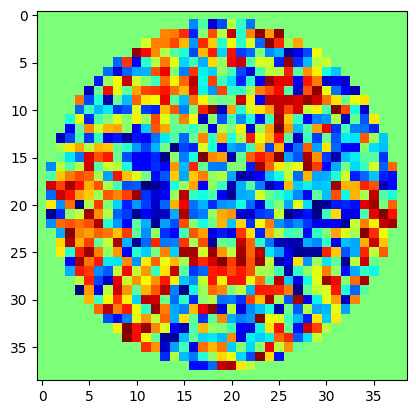

In [ ]:
plt.imshow(MS[4,:,:],cmap='jet',vmin=global_vmin,vmax=global_vmax)

In [ ]:
# Seleccionar 8 imágenes aleatorias sin repetición
indices = np.random.choice(MS.shape[0], size=8, replace=False)

# Crear figura
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for ax, idx in zip(axes.flat, indices):
    im = ax.imshow(MS[idx, :, :], cmap='jet', vmin=global_vmin, vmax=global_vmax)
    ax.axis("off")  # quitar ejes
    # Agregar colorbar a cada subplot
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig("imagenes_grid2.svg", format="svg", bbox_inches="tight")
plt.close()

## LLEVAMOS A LA NUEVA DIMENSION

In [ ]:
def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))  # Redimensionar
    image = tf.image.grayscale_to_rgb(image)  # Convertir a 3 canales
    return image
# Crear dataset de TensorFlow
dataset = tf.data.Dataset.from_tensor_slices(MS_filtrado)
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Convertir a un array numpy si es necesario
processed_images = np.array(list(dataset.as_numpy_iterator()))

In [ ]:
np.savez_compressed("/content/drive/MyDrive/imagenes_comprimidasBASE2_ESTADOS_SIMILARES.npz", data=processed_images)

In [ ]:
params_sampled = {
    'T': T_filtrado
}

In [ ]:
Y = np.stack([
    params_sampled['T']
], axis=1)

In [ ]:
Y.shape

(273, 1)

In [ ]:
np.savez_compressed("/content/drive/MyDrive/outputsBASE2_ESTADOS_SIMILARES.npz", data=Y)